# Ödev 2
Fatma Pınar İPEK FIRATLI
*****

### Soru1: One hot encoding modelin görmediği veriye nasıl uygulanır?

- One hot encoding işlemi kategorik değişkenlerin *1* veya *0* olarak gösterilmesi için uygulanan işlemdir.  Bu işlemi makine öğrenmesi kategorik verileri işleyemeyeceği için sayısal değerlere dönüştürmek için kullanıyoruz.

- Öncelikle verimizi train ve validation verileri olarak ayırıyoruz. Validation verileri modelin görmediği verilerimiz olacak. Daha sonra bu verilerin içerisinde bulunan kategorik olan kolonları belirleyerek encoding işlemi için ayırıyoruz.. Programımıza `sklearn` paketinden one hot encoding işlemini import ediyoruz. İmport işleminden sonra one hot encoding işleminin nasıl yapacağını programa tanıtarak bu tanıtma işlemi sonrası `fit.transform` uygulayarak array haline getiriyoruz. En sonunda ise ayırıp encoding yaptığımız veriler ile sayısal verileri `concat` işlemi bir araya getiriyoruz.

- Kullanım şeklinden bahsedecek olursak;
    -  OneHotEncoder import işlemi
        - `from sklearn.preprocessing import OneHotEncoder` 
    -  Nasıl OneHotEncoder edileceği
        - `ohe = OneHotEncoder(handle_unknown='ignore')`
    -  Data verisine OneHotEncoder uygulanarak encoding yapılmış data_ohe verisini oluşturma
        - `data_ohe=ohe.fit_transform(data[columns_to_encode]).toarray()`

*****

### Soru2: Labelencoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi)

- Kategorik değerleri sayısal değerlere çevirmek için o değerlere sayısal olarak 1,2,3,4.. gibi değerlere çevrilmesiyle yapılır. Bu değerler sayısal olarak büyüklük gösterebilecek sıralamadadır. 1. sorunun çözümünde makine öğrenmesinin kategorik verileri işleyemeyeceğinden bahsetmiştim. Label encoding de kendi içerisinde büyüklük küçüklük belirten yine kategorik verilerin sayısal değerlere dönüştürülmesinde kullanılmaktadır.

- Ölçeklendirme yapılırken verilen kategorik değerlerin hangi değerleri alacağına bizler karar vererek birer dict veri yapısı oluşturuyoruz. Örnek verecek olursak; *incident_severity* değeri kategorik bir değer ancak bu değerler kendi içlerinde büyüklük küçüklük belirtebiliyor. Label encoding uygularak;
    - Total Loss      ->   1
    - Minor Damage    ->   2
    - Major Damage    ->   3			
    - Trivial Damage  ->   4
    
    şeklinde sayısal olarak encode edebiliriz.

- Kullanım şeklinden bahsedecek olursak;
    -  LabelEncoder import işlemi
        - `from sklearn.preprocessing import LabelEncoder` 
    -  LabelEncoding işlemi tanımlama
        - `le = LabelEncoder()`
    -  Data verisine LabelEncoder uygulanarak encoding yapılmış data_ohe verisini oluşturma
        - `data["incident_severity"] = le.fit.transform(data["incident_severity"])`


******

### Soru3: Imbalance datasette train test split yaparken neleri göz önünde bulundurmalıyız?

- Imbalance dataset sınıflandırma yaparken sınıfların eşit dağılmadığı data kümesidir. Yani bu her sınıfta yaklaşık olarak eşit miktarda datanın olmadığı anlamına gelir. Train test split işlemi yapmadan önce datasetimizi önce balance hale getirmemiz gerekmekte. Çünkü bu modelin performansını etkiler. Bu işlem için öncelikle verilerdeki değer farklarını göz önünde bulundurarak veri kaybının ne kadar olduğunu kontrol etmeli ve buna göre nasıl bir yöntem uygulayacağımızın kararını verilmeliyiz. Balance işlemi yaparken yeniden örnekleme, sınıf ağırlıklarını ayarlama veya SMOTE işlemlerinden faydalanabiliriz. Bu yöntemler ile dengeli hale getirerek daha sağlıklı train ve test split işlemi uygularız.


*****

### Soru4: Validation dataseti (modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir?

- Bize verilen dataseti makine öğrenmesine sokmadan önce train ve validation olarak bölmemiz gerekiyor. Araştırma yaptığımda bazı sayfalarda validation dataseti, verilen dataseti üzerinden önce train ve test diye ayrılıp sonra train içerisinde train ve validation olarak tekrar ayrılabiliyor. Ancak bizden istenen modelin görmediği bir validation dataseti olduğu için biz ilk seçeneği kullanacağız. Yani bize verilen dataset ***train & test*** ve ***validation*** şeklinde ayrılır. Bu şekilde ayrılan validation dataseti eğitilecek modelin içinde bulunmamış olur. Ayrıca ***train & test*** kısmında uyguladığımız işlemleri ***validation*** kısmında da uygulamalıyız. Böylelikle başarı seviyesini yükseltebilir ve prediction için hazırlık yapmış oluruz.

******

### Soru5: predict_proba metoduyla oran nasıl hesaplanır ve treshold nasıl değiştirilir?

- predict_proba methodu sınıflandırma problemlerinde yapılan gözlemlerin o sınıflara ait olma olasılıklarını elde etmek için kullanılır. Elde edilen değerler 0 ile 1 aralığındadır.

- Oran hesaplama aşağıdaki şekilde hesaplanır;
    - ` y_pr_proba = data.predict_proba(X_test) `

-  Threshold uygulama ve değiştirme
    - Default threshold değeri 0.5'dir
        - ` y_pr_proba = data.predict_proba(X_test) ` 
    - Threshold değeri 0.3 olarak değiştirildi
        - ` y_pr_proba = (data.predict_proba(X_test)[:,1] >= 0.3).astype(bool) `



*******

### Soru6: Fraud case'i üzerinde train&test&validation split, encoding, scaling,modelleme çalışmaları Python'da yapılarak, modelin görmediği dataset üzerinde başarılı sonuç alacak bir model örneği yapılmalı.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


#for quick viz
import seaborn as sns

#ml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import random

In [2]:
data = pd.read_csv('auto_insurance_csv.csv')

data = data.drop(['_c39','Unnamed: 0'], axis = 1)
data['umbrella_limit'] = data.umbrella_limit.fillna("9999")
data['police_report_available'] = data.police_report_available.fillna("MISSING")
data['policy_csl'] = data.policy_csl.fillna("MISSING")
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
data['incident_date'] = pd.to_datetime(data['incident_date'])
data['claim_day_of_policy'] = (data.incident_date - data.policy_bind_date).dt.days
data['location_check'] = np.nan
data['location_check'] = np.where(data['policy_state'] == data['incident_state'], True, False)
data['fraud_reported'] = data['fraud_reported'].str.replace('Y', '1')
data['fraud_reported'] = data['fraud_reported'].str.replace('N', '0')
data['fraud_reported'] = data['fraud_reported'].astype(int)
data['umbrella_limit'] = data.umbrella_limit.astype(str)
umbrealla = data['umbrella_limit'].unique()
for umb in umbrealla:
  if (umb != '0.0') & (umb != '9999'):
    data['umbrella_limit'] = data['umbrella_limit'].str.replace(umb, 'other')
    
hobbies = data['insured_hobbies'].unique()
for hobby in hobbies:
  if (hobby != 'chess') & (hobby != 'cross-fit'):
    data['insured_hobbies'] = data['insured_hobbies'].str.replace(hobby, 'other')

data['age'] = data.age.fillna(9999)
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','9999']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 9999]

data['age_group'] = pd.cut(data['age'], bins = bins, labels = bin_labels, include_lowest = True)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

data['months_as_customer_groups'] = pd.cut(data['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

data['policy_annual_premium_groups'] = pd.cut(data['policy_annual_premium'], bins = bins, labels=bin_labels)
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

data['policy_deductable_group'] = pd.cut(data['policy_deductable'], bins = bins, labels = bin_labels)

data = data.drop(['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium'], axis = 1)
required_columns = ['incident_date','policy_state', 'policy_csl', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount','auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'location_check', 'age_group', 'months_as_customer_groups',
       'policy_annual_premium_groups', 'policy_deductable_group']
df = data[required_columns]
df

C:\Users\GokhanF\AppData\Local\Temp/ipykernel_8288/1137369937.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  data['umbrella_limit'] = data['umbrella_limit'].str.replace(umb, 'other')


,incident_date,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
0,2015-01-25,OH,250/500,0.0,466132,MALE,MD,craft-repair,other,husband,...,Saab,92x,2004,1,100,False,46-50,301-350,medium,501-1000
1,2015-01-21,IN,250/500,other,468176,MALE,MD,machine-op-inspct,other,other-relative,...,Mercedes,E400,2007,1,3130,False,41-45,201-250,medium,1501-2000
2,2015-02-22,OH,MISSING,other,430632,FEMALE,PhD,sales,other,own-child,...,Dodge,RAM,2007,0,5282,False,26-30,101-150,medium,1501-2000
3,2015-01-10,IL,MISSING,other,608117,FEMALE,PhD,armed-forces,other,unmarried,...,Chevrolet,Tahoe,2014,1,8996,False,41-45,251-300,medium,1501-2000
4,2015-02-17,IL,MISSING,other,610706,MALE,Associate,sales,other,unmarried,...,Accura,RSX,2009,0,256,False,41-45,201-250,high,501-1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2015-02-22,OH,MISSING,0.0,431289,FEMALE,Masters,craft-repair,other,unmarried,...,Honda,Accord,2006,0,8622,False,36-40,0-50,medium,501-1000
996,2015-01-24,IL,MISSING,9999,608177,FEMALE,PhD,prof-specialty,other,wife,...,Volkswagen,Passat,2015,0,384,False,41-45,251-300,medium,501-1000
997,2015-01-23,OH,250/500,other,442797,FEMALE,Masters,armed-forces,other,other-relative,...,Suburu,Impreza,1996,0,4358,False,9999,101-150,medium,0-500
998,2015-02-26,IL,500/1000,9999,441714,MALE,Associate,handlers-cleaners,other,wife,...,Audi,A5,1998,0,1196,False,61-65,451-500,medium,1501-2000


In [3]:
#Train ve validation verilerinin 800 ve 200 olarak ayrılması
df_val = df.sort_values(by='incident_date',ascending=False).head(200)
df2 = df.sort_values(by='incident_date',ascending=False).tail(800)
#incident_date'e göre sıralanması
df.sort_values(by='incident_date',ascending=False)
#incident_date verisinin kaldırılması
df_val = df_val.drop(["incident_date"],axis=1)
df2 = df2.drop(["incident_date"],axis=1)

#kategorik değerlerin olduğu kolonların ayrılması ve listelenmsi
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
  df2[col] = df2[col].astype('object')

columns_to_encode = []
for col in df2.columns:
  if df2[col].dtype == 'object':
    columns_to_encode.append(col)

columns_to_encode

['policy_state',
 'policy_csl',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'location_check',
 'age_group',
 'months_as_customer_groups',
 'policy_annual_premium_groups',
 'policy_deductable_group']

In [4]:
df2.head()

,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
511,OH,MISSING,0.0,446755,FEMALE,JD,sales,other,husband,0,...,Volkswagen,Jetta,2003,0,4427,False,46-50,251-300,medium,501-1000
894,IN,MISSING,0.0,475891,MALE,MD,priv-house-serv,other,not-in-family,0,...,Suburu,Impreza,2000,0,8921,False,31-35,0-50,medium,0-500
125,IN,MISSING,other,603948,MALE,JD,craft-repair,other,unmarried,47200,...,Ford,Escape,2013,0,205,False,36-40,201-250,medium,501-1000
895,IL,MISSING,0.0,462525,MALE,High School,armed-forces,other,own-child,26500,...,Saab,92x,1998,1,1980,False,36-40,151-200,medium,0-500
485,IN,MISSING,0.0,471366,MALE,Associate,adm-clerical,other,husband,0,...,Nissan,Maxima,1995,0,7692,False,26-30,51-100,medium,1501-2000


In [5]:
df3 = pd.get_dummies(df2, columns = columns_to_encode)

df3

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
511,446755,0,-46200,9,1,2,3,6560,2003,0,...,0,0,0,0,1,0,0,0,0,1
894,475891,0,0,6,1,1,3,6000,2000,0,...,0,0,0,0,1,0,0,1,0,0
125,603948,47200,-69700,12,3,2,3,36300,2013,0,...,0,0,0,0,1,0,0,0,0,1
895,462525,26500,0,23,3,0,3,55200,1998,1,...,0,0,0,0,1,0,0,1,0,0
485,471366,0,-31700,0,1,2,1,48290,1995,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,472814,0,0,3,4,0,1,67800,2011,0,...,0,0,1,0,0,0,0,1,0,0
457,470559,38000,-41200,5,1,2,1,79800,2011,1,...,0,0,1,0,0,0,0,0,1,0
478,477260,0,0,6,1,1,2,6300,2001,1,...,0,0,0,1,0,0,0,0,1,0
41,470577,0,-24100,1,1,1,1,97080,2001,1,...,0,0,1,0,0,0,0,1,0,0


In [6]:
dfencode = pd.get_dummies(df2, columns = columns_to_encode)
cl=[]
for _ in dfencode.columns:
    cl.append(_)
# cl

In [7]:
# kolonların kategorik ve sayısal ayrılması
dfencode_10 = dfencode.iloc[:,:11]
cl_kalan = cl[11:]

In [8]:
dfencode_10.head(10)

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,claim_day_of_policy
511,446755,0,-46200,9,1,2,3,6560,2003,0,4427
894,475891,0,0,6,1,1,3,6000,2000,0,8921
125,603948,47200,-69700,12,3,2,3,36300,2013,0,205
895,462525,26500,0,23,3,0,3,55200,1998,1,1980
485,471366,0,-31700,0,1,2,1,48290,1995,0,7692
398,604328,0,-47400,7,1,0,1,3190,2015,0,8231
295,438546,0,-54600,13,1,1,2,72120,2009,0,3483
542,431354,0,0,21,3,1,3,48070,2014,0,2591
285,476737,0,-40900,8,1,0,1,70290,2008,0,6798
858,437470,0,0,17,3,2,3,42500,2000,0,5385


In [9]:
features = []
for col in df3.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X = df3[features]
y = df3[target]

In [10]:
#Standart ölçeklendirme
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.76745023, -0.90867046, -0.68250677, ..., -0.71374643,
        -0.67616189,  1.36652242],
       [-0.36042417, -0.90867046,  0.96145549, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [ 1.42851515,  0.79450874, -1.51872134, ..., -0.71374643,
        -0.67616189,  1.36652242],
       ...,
       [-0.34129942, -0.90867046,  0.96145549, ..., -0.71374643,
         1.47893576, -0.73178456],
       [-0.43466004, -0.90867046,  0.10389076, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [ 1.55253963,  0.97493027,  0.96145549, ...,  1.4010578 ,
        -0.67616189, -0.73178456]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

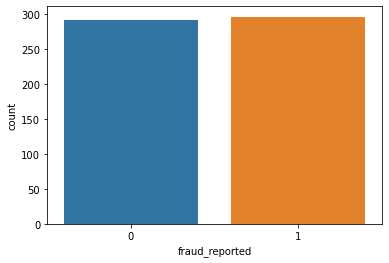

In [11]:
#SMOTE adımı
oversample = SMOTE(random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 1)

chck = pd.DataFrame()
chck['fraud_reported'] = y_train
sns.countplot(chck['fraud_reported'])

In [12]:
#One Hot Enoding işlemi
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
df3=ohe.fit_transform(df2[columns_to_encode]).toarray()

In [13]:
df3

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [14]:
dfencode_10.reset_index(drop = True, inplace = True)
dfencode_kalan=pd.DataFrame(df3, columns=cl_kalan)
dfencode_toplam = pd.concat([dfencode_10,dfencode_kalan], axis=1)
dfencode_toplam.head()

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,446755,0,-46200,9,1,2,3,6560,2003,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,475891,0,0,6,1,1,3,6000,2000,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,603948,47200,-69700,12,3,2,3,36300,2013,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,462525,26500,0,23,3,0,3,55200,1998,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,471366,0,-31700,0,1,2,1,48290,1995,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [15]:
#Feature ve Target işlemi
features = []
for col in dfencode_toplam.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X = dfencode_toplam[features]
y = dfencode_toplam[target]

#y1 =  df2[['fraud_reported']]
X

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,claim_day_of_policy,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,446755,0,-46200,9,1,2,3,6560,2003,4427,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,475891,0,0,6,1,1,3,6000,2000,8921,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,603948,47200,-69700,12,3,2,3,36300,2013,205,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,462525,26500,0,23,3,0,3,55200,1998,1980,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,471366,0,-31700,0,1,2,1,48290,1995,7692,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,472814,0,0,3,4,0,1,67800,2011,8397,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,470559,38000,-41200,5,1,2,1,79800,2011,759,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
797,477260,0,0,6,1,1,2,6300,2001,6130,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
798,470577,0,-24100,1,1,1,1,97080,2001,854,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
#Standart ölçeklendirme
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.76745023, -0.90867046, -0.68250677, ..., -0.71374643,
        -0.67616189,  1.36652242],
       [-0.36042417, -0.90867046,  0.96145549, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [ 1.42851515,  0.79450874, -1.51872134, ..., -0.71374643,
        -0.67616189,  1.36652242],
       ...,
       [-0.34129942, -0.90867046,  0.96145549, ..., -0.71374643,
         1.47893576, -0.73178456],
       [-0.43466004, -0.90867046,  0.10389076, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [ 1.55253963,  0.97493027,  0.96145549, ...,  1.4010578 ,
        -0.67616189, -0.73178456]])

92.06349206349206

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       128
           1       0.96      0.88      0.92       124

    accuracy                           0.92       252
   macro avg       0.92      0.92      0.92       252
weighted avg       0.92      0.92      0.92       252



<AxesSubplot:>

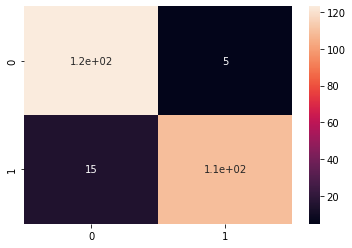

In [17]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

#prediction işlemi
preds = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

In [19]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 17, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 650, 1000]},
                   random_state=42, verbose=2)

In [20]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 17,
 'bootstrap': False}

92.06349206349206

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       128
           1       0.96      0.87      0.92       124

    accuracy                           0.92       252
   macro avg       0.93      0.92      0.92       252
weighted avg       0.92      0.92      0.92       252



<AxesSubplot:>

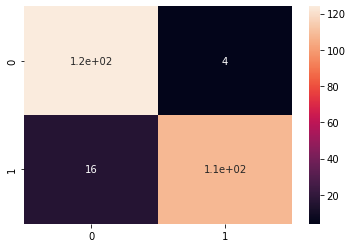

In [21]:
rf2 = RandomForestClassifier(n_estimators=1000,min_samples_split=5,min_samples_leaf=1,max_features='auto'
                            ,max_depth=17,bootstrap='False')
rf2.fit(X_train, y_train)

preds = rf2.predict(X_test)

score = rf2.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

In [33]:
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
  df_val[col] = df_val[col].astype('object')

columns_to_encode = []
for col in df_val.columns:
  if df_val[col].dtype == 'object':
    columns_to_encode.append(col)

df2_val = pd.DataFrame(ohe.transform(df_val[columns_to_encode]).toarray(), columns=cl_kalan)
df2_val.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,policy_csl_MISSING,umbrella_limit_0.0,umbrella_limit_9999,umbrella_limit_other,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [34]:
 # Sayısal kolonlar
cl_val = cl[:11]
df_val_num = pd.DataFrame(df_val, columns=cl_val)

df_val_num.reset_index(drop=True, inplace=True)

df3_val = pd.concat([df_val_num,df2_val], axis=1)
df3_val.head()

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,441533,57100,0,2,4,0,2,38640,1997,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,472895,0,0,18,3,1,0,42930,2005,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,436364,0,-67000,2,4,0,2,72800,1998,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,479824,0,0,18,3,0,3,34160,2005,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,448294,0,-48800,4,1,2,2,51600,2011,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [35]:
features = []
for col in df3_val.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X_val = df3_val[features]
y_val = df3_val[target]

33.5

              precision    recall  f1-score   support

           0       0.94      0.20      0.32       163
           1       0.21      0.95      0.34        37

    accuracy                           0.34       200
   macro avg       0.58      0.57      0.33       200
weighted avg       0.81      0.34      0.33       200



<AxesSubplot:>

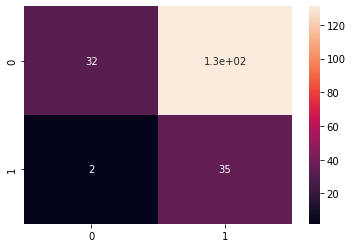

In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_val = sc.fit_transform(X_val)

preds = rfc.predict(X_val)
score = rfc.score(X_val, y_val)
print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

27.0

              precision    recall  f1-score   support

           0       0.92      0.63      0.74       163
           1       0.31      0.76      0.44        37

    accuracy                           0.65       200
   macro avg       0.62      0.69      0.59       200
weighted avg       0.81      0.65      0.69       200



<AxesSubplot:>

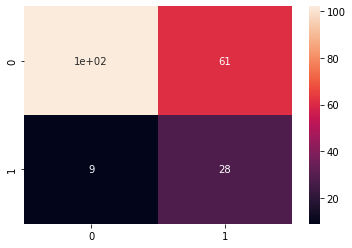

In [50]:
preds = rf2.predict_proba(X_val)
score = rf2.score(X_val, y_val)
y_preds = (preds[:,1] >= 0.6).astype(bool)
print(score*100)
print()
print(classification_report(y_val, y_preds))

cm = confusion_matrix(y_val, y_preds)
sns
sns.heatmap(cm, annot=True)